# **Experiment 6:** **Convolution, Filtering, and Motion Blur in Digital Images**
Develop a Python program using OpenCV to apply convolution-based filtering techniques and
simulate motion blur.

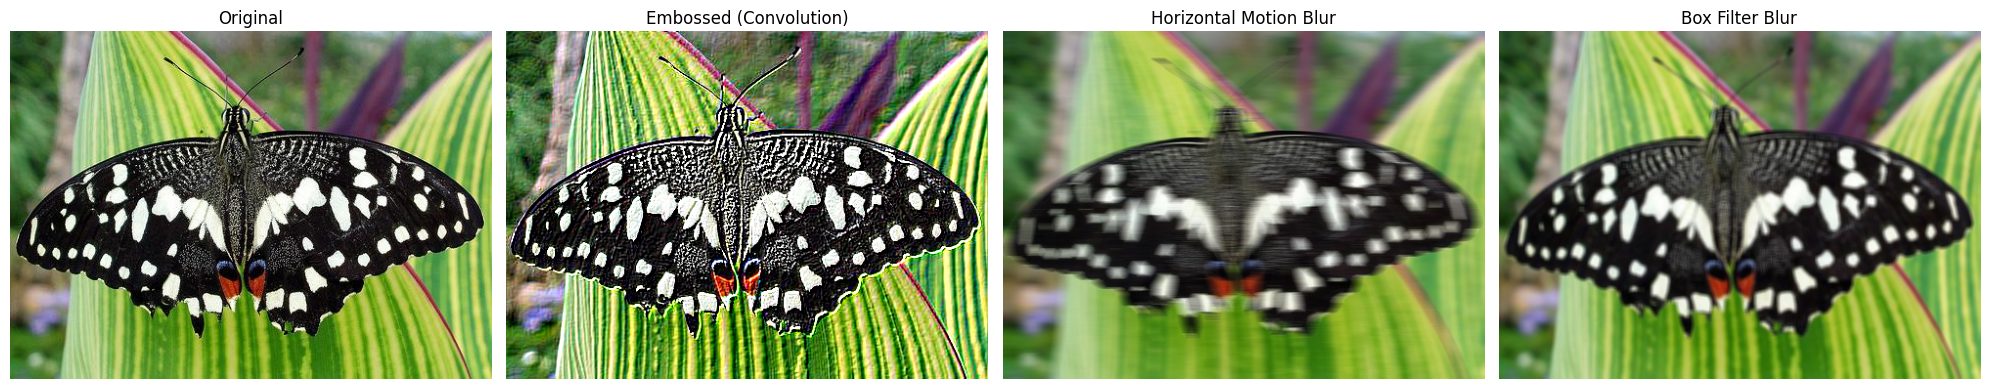

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# 1. Load the image
!wget -q -O input.jpg https://raw.githubusercontent.com/opencv/opencv/master/samples/data/butterfly.jpg
image = cv2.imread('input.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ---------------------------------------------------------
# 2. CUSTOM CONVOLUTION (Embossing)
# ---------------------------------------------------------
# Embossing highlights differences in lighting to create a 3D effect
kernel_emboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])
embossed = cv2.filter2D(image_rgb, -1, kernel_emboss)

# ---------------------------------------------------------
# 3. MOTION BLUR (Horizontal)
# ---------------------------------------------------------
size = 15  # The larger the size, the more the blur
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size  # Normalize

motion_blur = cv2.filter2D(image_rgb, -1, kernel_motion_blur)

# ---------------------------------------------------------
# 4. BOX FILTER (General Convolution Blur)
# ---------------------------------------------------------
# A uniform kernel that averages all surrounding pixels
kernel_box = np.ones((5,5), np.float32) / 25
box_filter = cv2.filter2D(image_rgb, -1, kernel_box)

# 5. Visualization
plt.figure(figsize=(20, 10))
titles = ['Original', 'Embossed (Convolution)', 'Horizontal Motion Blur', 'Box Filter Blur']
images = [image_rgb, embossed, motion_blur, box_filter]

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()